In [ ]:
1. Compare Multiple Models
Use:


Random Forest or XGBoost (nonlinear, feature importance)

k-NN or SVR (for curve-fitting)

→ Why: Shows you understand model tradeoffs and aren't blindly fitting.

📈 2. Do Real Feature Engineering
Convert 5K and 10K times to pace per km

Use training ratio: (2025 km) / (all-time km)

Encode sex as binary or categorical

Create an age group or age-squared term

→ Why: Shows skill in shaping raw inputs into usable predictors.

🧪 3. 

Analyze where model errors are largest — are they biased toward younger runners? Slower ones?

→ Why: Demonstrates rigorous evaluation.


📎 Extra Credit Ideas
Add heart rate or training intensity if you tracked it (Strava/Garmin/Coros data).

Try clustering runners by performance profiles before regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [7]:
# We already cleaned and preprocessed the data:

df = pd.read_csv("C:/Users/hadip/Downloads/Portfolio/half_marathon/data/cleaned_half_marathon_data.csv")
df

,TEMPO_REALE_SECONDS,ANNO,2025_km,5K_PB,log_total_km,SESSO_M
0,7664.0,1997,40.0,1723.0,5.869297,0
1,8163.0,1986,41.0,1598.0,4.634729,1
2,6080.0,1993,44.0,1299.0,5.768321,1
3,7653.0,2001,109.0,1649.0,4.691348,1
4,6984.0,1995,133.0,1475.0,5.093750,1
...,...,...,...,...,...,...
111,4310.0,1987,1662.0,942.0,8.413387,1
112,4196.0,1993,1703.0,918.0,8.030410,1
113,4873.0,1992,1762.0,963.0,7.987524,1
114,6830.0,1978,1986.0,1350.0,8.322637,0


In [9]:
# Define inputs and target
x = df.drop(columns=['TEMPO_REALE_SECONDS']) 
y = df["TEMPO_REALE_SECONDS"]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# Training and test predictions
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

# R² Scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train R²: {r2_train:.3f}")
print(f"Test R²: {r2_test:.3f}")


Train R²: 0.957
Test R²: 0.669


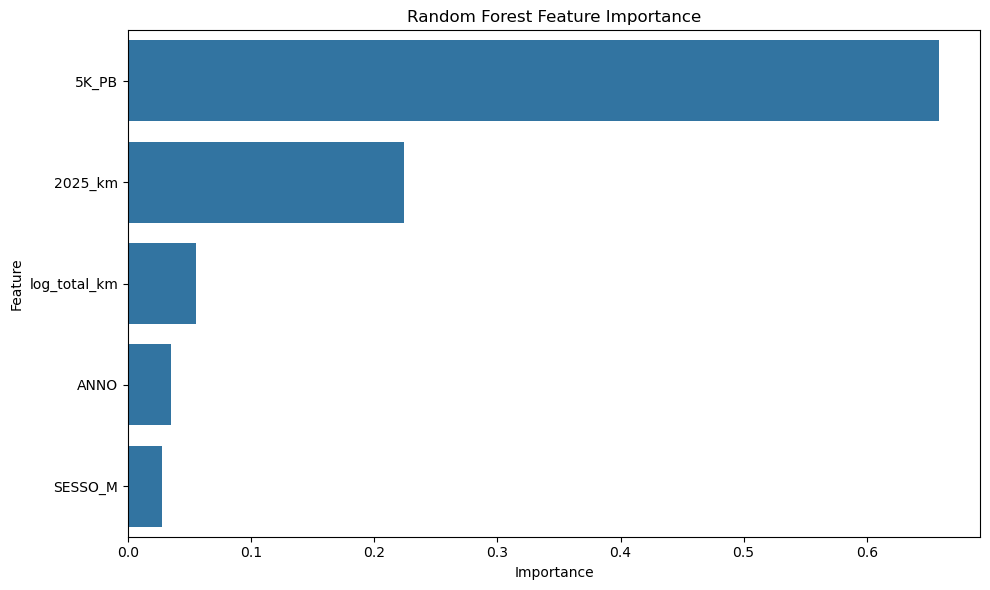

In [19]:
importances = rf.feature_importances_
features = x.columns

# Create a DataFrame
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


In [27]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, x, y, cv=kf, scoring='r2')

print(f"CV R² Scores: {cv_scores}")
print(f"Average CV R²: {cv_scores.mean():.3f}")

CV R² Scores: [0.64954209 0.61077368 0.82390282 0.80569135 0.82503067]
Average CV R²: 0.743
